## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [5]:
from sklearn.datasets import load_boston

In [6]:
data = load_boston()

In [7]:
x, y = data['data'], data['target']

In [8]:
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [9]:
y[1]

21.6

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pylab as plt

In [20]:
x_rm = x[:, 5]

In [21]:
def draw_rm_and_price():
    plt.scatter(x_rm, y)

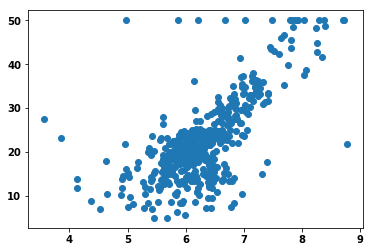

In [22]:
draw_rm_and_price()

## loss

$$ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n}\sum{|y_i - (kx_i + b)|}$$

$yi > \hat{y_i}:$ $$   \frac{\partial{loss}}{\partial{k}} = -\frac{1}{n}\sum x_i$$

$yi < \hat{y_i}:$ $$   \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum x_i $$

$yi > \hat{y_i}:$ $$   \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum -1$$

$yi > \hat{y_i}:$ $$   \frac{\partial{loss}}{\partial{b}} = \frac{1}{n}\sum 1$$

In [41]:
def loss(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [23]:
def price(rm, k, b):
    return k * rm + b

In [29]:
def patial_k(x, y, y_hat):
    n = len(y)    
    gardient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gardient -= x_i
        else:
            gardient += x_i
    return 1 / n * gardient

def patial_b(x, y, y_hat):
    n = len(y)    
    gardient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            gardient += -1
        else:
            gardient -= 1
    return 1 / n * gardient
    

In [24]:
import random

In [43]:
trying_times = 20000

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 500 == 0:
            print('When time is : {}, get best_k : {} best_b : {}, and the loss is : {}'.format(i, current_k, current_b, current_loss))
            
    k_gradient = patial_k(x_rm, y, price_by_k_and_b)
    b_gradient = patial_b(x_rm, y, price_by_k_and_b)
    
    current_k = current_k + ( -1 * k_gradient) * learning_rate
    current_b = current_b + ( -1 * b_gradient) * learning_rate
    


When time is : 0, get best_k : -82.90344514712078 best_b : -78.83207563438339, and the loss is : 622.3827241600214
When time is : 500, get best_k : -79.76112795344281 best_b : -78.332075634381, and the loss is : 602.1344094686632
When time is : 1000, get best_k : -76.61881075976484 best_b : -77.83207563437861, and the loss is : 581.8860947773061
When time is : 1500, get best_k : -73.47649356608687 best_b : -77.33207563437622, and the loss is : 561.6377800859486
When time is : 2000, get best_k : -70.3341763724089 best_b : -76.83207563437384, and the loss is : 541.3894653945904
When time is : 2500, get best_k : -67.19185917873094 best_b : -76.33207563437145, and the loss is : 521.1411507032328
When time is : 3000, get best_k : -64.04954198505297 best_b : -75.83207563436906, and the loss is : 500.89283601187515
When time is : 3500, get best_k : -60.9072247913785 best_b : -75.33207563436667, and the loss is : 480.64452132053947
When time is : 4000, get best_k : -57.76490759770409 best_b : 

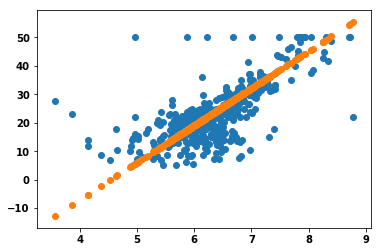

In [44]:
k = 13.065496675012332
b = -59.33207563432344
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_k_and_b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

参考自https://www.jianshu.com/p/a617d20162cf
其中指示函数和第二行（index = 1）推导有误

In [11]:
def Edit_Distance(str1, str2):
    """
    计算字符串 str1 和 str2 的编辑距离
    :param str1
    :param str2
    :return:
    """
    # i+j的原因主要是为了记录0行0列的数据，其他的都会在后面替换成正确的值
    matrix = [[ i + j for j in range(len(str2) + 1)] for i in range(len(str1) + 1)]

    for i in range(1, len(str1)+1):
        for j in range(1, len(str2)+1):
            if(str1[i-1] == str2[j-1]):
                d = 0
            else:
                d = 1
            
            matrix[i][j] = min(matrix[i-1][j]+1, matrix[i][j-1]+1, matrix[i-1][j-1]+d)

    return matrix[len(str1)][len(str2)]


In [12]:
Edit_Distance('ahfds', 'fhdj')

[[0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8], [5, 6, 7, 8, 9]]


3

老师的原代码

In [52]:
solution = {}

In [53]:
from functools import lru_cache

In [54]:
i = 0
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    global i
    i += 1
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        # delete tail_s1 for string 1; edit_distance + 1 for each deletion
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2))
        # add tail_s2 to string 1; edit_distance + 1 for each addition
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
        # no edits
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 
                        'SUB {} => {}'.format(tail_s1, tail_s2))
        # substitute tail_s2 for tail_s1; edit_distance + 1 for each substitution
        
    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    # find the minimal edit distance among all possible operations
    
    solution[(string1, string2)] = operation # store solution to dictionary
    
    return min_distance   


In [55]:
edit_distance('ABCD', 'ABCDE')

1

In [56]:
i

30

In [57]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCD'): 'ADD D',
 ('A', 'ABCDE'): 'ADD E',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCD'): 'ADD D',
 ('AB', 'ABCDE'): 'ADD E',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCD'): 'ADD D',
 ('ABC', 'ABCDE'): 'ADD E',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCD'): '',
 ('ABCD', 'ABCDE'): 'ADD E'}

In [80]:
solution = {}

代码优化

In [81]:
i = 0
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    global i
    i += 1
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1] 

    
    if tail_s1 == tail_s2:
        candidates = [(edit_distance(string1[:-1], string2[:-1]) + 0, '')]
        # no edits
    else:
        candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),
        # delete tail_s1 for string 1; edit_distance + 1 for each deletion
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),
        # add tail_s2 to string 1; edit_distance + 1 for each addition
        (edit_distance(string1[:-1], string2[:-1]) + 1, 
                        'SUB {} => {}'.format(tail_s1, tail_s2))
    ]

    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    # find the minimal edit distance among all possible operations
    
    solution[(string1, string2)] = operation # store solution to dictionary
    
    return min_distance  

In [60]:
edit_distance('ABCD', 'ABCDE')

1

In [61]:
i

20

In [62]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCD'): 'ADD D',
 ('A', 'ABCDE'): 'ADD E',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCD'): 'ADD D',
 ('AB', 'ABCDE'): 'ADD E',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCD'): 'ADD D',
 ('ABC', 'ABCDE'): 'ADD E',
 ('ABCD', 'ABCD'): '',
 ('ABCD', 'ABCDE'): 'ADD E'}

In [76]:
edit_distance('CV', 'ABDE')

4

In [79]:
solution

{('C', 'A'): 'SUB C => A',
 ('C', 'AB'): 'ADD B',
 ('C', 'ABD'): 'ADD D',
 ('C', 'ABDE'): 'ADD E',
 ('CV', 'A'): 'DEL V',
 ('CV', 'AB'): 'SUB V => B',
 ('CV', 'ABD'): 'ADD D',
 ('CV', 'ABDE'): 'ADD E'}

In [82]:
edit_distance('LHRE', 'ABDE')

3

In [83]:
edit_distance('XGEFAGD', 'AH')

6

In [85]:
solution

{('L', 'A'): 'SUB L => A',
 ('L', 'AB'): 'ADD B',
 ('L', 'ABD'): 'ADD D',
 ('LH', 'A'): 'DEL H',
 ('LH', 'AB'): 'SUB H => B',
 ('LH', 'ABD'): 'ADD D',
 ('LHR', 'A'): 'DEL R',
 ('LHR', 'AB'): 'DEL R',
 ('LHR', 'ABD'): 'SUB R => D',
 ('LHRE', 'ABDE'): '',
 ('X', 'A'): 'SUB X => A',
 ('X', 'AH'): 'ADD H',
 ('XG', 'A'): 'DEL G',
 ('XG', 'AH'): 'SUB G => H',
 ('XGE', 'A'): 'DEL E',
 ('XGE', 'AH'): 'DEL E',
 ('XGEF', 'A'): 'DEL F',
 ('XGEF', 'AH'): 'DEL F',
 ('XGEFA', 'A'): '',
 ('XGEFA', 'AH'): 'DEL A',
 ('XGEFAG', 'A'): 'DEL G',
 ('XGEFAG', 'AH'): 'SUB G => H',
 ('XGEFAGD', 'A'): 'DEL D',
 ('XGEFAGD', 'AH'): 'DEL D'}

In [96]:
# to parse the solutions, we need to define the exit condition ("查表"过程的终止条件)
# in this case, the exit condition is
# -- if the two strings are exactly the same, we stop editing

def stop_edit(string1, string2): return string1 == string2


# now we look for solutions in the "solution" dictionary

def parse_solution(string1, string2, solution_dic):
    
    parsed_solutions = [] 
    
    while not stop_edit(string1, string2):       
        
        if string2 == '':
            parsed_solutions.append('DEL {}'.format(string1[-1]))
            string1 = string1[:-1]
            continue
            
        if string1 == '':
            parsed_solutions.append('ADD {}'.format(string2[-1]))
            string2 = string2[:-1]
            continue
        
        operation = solution_dic[(string1, string2)] # "查表" 过程
        if 'SUB' in operation:
            string1, string2 = string1[:-1], string2[:-1] 
            # if substitution, both forward and compare
        elif operation == '':
            string1, string2 = string1[:-1], string2[:-1]
            # if no edits, both forward and compare
        elif 'DEL' in operation:
            string1, string2 = string1[:-1], string2 
            # delete tail of string1 and then compare
        elif 'ADD' in operation:
            string1, string2 = string1, string2[:-1] 
            # delete tail of string2 and then compare
#         print(string1, string2)
        if operation != '':
            parsed_solutions.append(operation)
    
    return parsed_solutions

In [97]:
parse_solution('XGEFAGD', 'AH', solution)

['DEL D', 'SUB G => H', 'DEL F', 'DEL E', 'DEL G', 'DEL X']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans:

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

动态规划算法通常用于求解具有某种最优性质的问题。在这类问题中，可能会有许多可行解。每一个解都对应于一个值，我们希望找到具有最优值的解。
之前的搜索算法解，建立一个字典，记录着每个节点的连接点，若遇到上课这种木材分割问题，你无法知道给定的是多少木材，无法建立字典，或者说，为了满足需求，需要建立较大的字典，这个时候用动态分割，利用递归思想对其进行分割，便可以方便快捷的解决类似问题。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

对于特定问题采取最适合、最简单的方法

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

最短路线、库存管理、资源分配

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

输入错误智能识别、语音识别矫正、抄袭侦测、DNA分析、相似度计算

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

1.最优子结构性质。如果问题的最优解所包含的子问题的解也是最优的，我们就称该问题具有最优子结构性质（即满足最优化原理）。最优子结构性质为动态规划算法解决问题提供了重要线索。
2.无后效性。即子问题的解一旦确定，就不再改变，不受在这之后、包含它的更大的问题的求解决策影响。
3.子问题重叠性质。子问题重叠性质是指在用递归算法自顶向下对问题进行求解时，每次产生的子问题并不总是新问题，有些子问题会被重复计算多次。动态规划算法正是利用了这种子问题的重叠性质，对每一个子问题只计算一次，然后将其计算结果保存在一个表格中，当再次需要计算已经计算过的子问题时，只是在表格中简单地查看一下结果，从而获得较高的效率。

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

1. 没有统一的标准模型；
2. 数值方法求解时存在维数灾。

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

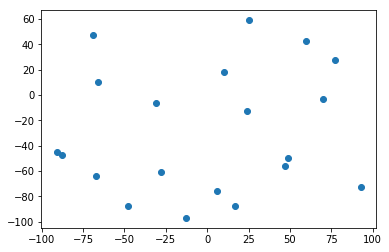

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

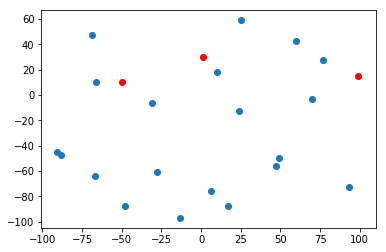

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

先解决一个点，一辆车

In [7]:
def distance(point1, point2):    
    square = (point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2
#     print(point1[0], point2[0], point1[1], point2[1], square)
    return square ** (1/2)

In [8]:
point_list = [(x, y) for x, y in zip(latitudes, longitude)]

In [9]:
point_list

[(-31, -6),
 (70, -3),
 (-13, -97),
 (-69, 47),
 (10, 18),
 (-91, -45),
 (49, -50),
 (47, -56),
 (-28, -61),
 (17, -88),
 (-48, -88),
 (77, 28),
 (-88, -47),
 (-67, -64),
 (25, 59),
 (24, -13),
 (60, 43),
 (-66, 10),
 (93, -73),
 (6, -76)]

In [10]:
route = [chosen_p]
distance_sum = 0

def get_route(start, point_list):
    if point_list == []: return
    min_distance = float('inf')
    for point in point_list:
#         print(point, distance(start, point))
        if distance(start, point) < min_distance:
            min_point = point
            min_distance = distance(start, point)
#     print(point, min_distance)
    route.append(min_point)
    point_list.remove(min_point)
    global distance_sum 
    distance_sum += min_distance
    get_route(min_point, point_list)

In [11]:
get_route(chosen_p, point_list)

In [12]:
route

[(-50, 10),
 (-66, 10),
 (-69, 47),
 (-31, -6),
 (10, 18),
 (24, -13),
 (49, -50),
 (47, -56),
 (17, -88),
 (6, -76),
 (-13, -97),
 (-48, -88),
 (-67, -64),
 (-88, -47),
 (-91, -45),
 (-28, -61),
 (70, -3),
 (77, 28),
 (60, 43),
 (25, 59),
 (93, -73)]

In [13]:
distance_sum = distance_sum + distance(route[-1], chosen_p)

In [14]:
distance_sum

1022.3135352894785

In [ ]:
route.append(chosen_p)

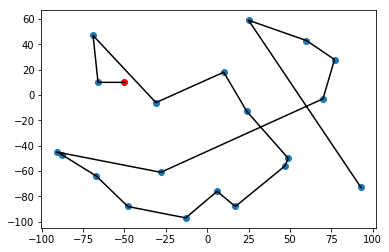

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

很明显，这种方法有问题，下面用向量法试一试

In [16]:
import math

In [17]:
math.acos(-1/2)

2.0943951023931957

In [18]:
distance((12, -61), (-13, -96))

43.01162633521314

In [19]:
math.degrees(math.acos(1/2))

60.00000000000001

In [20]:
math.pi

3.141592653589793

In [21]:
def angle(chosen_p, point1, point2):
    vector1 = (chosen_p[0] - point1[0], chosen_p[1] - point1[1])
    vector2 = (point2[0] - point1[0], point2[1] - point1[1])
    dot = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    size1 = (vector1[0] ** 2 + vector1[1] ** 2) ** (1/2)
    size2 = (vector2[0] ** 2 + vector2[1] ** 2) ** (1/2)
    return math.acos(dot / size1 / size2)

In [24]:
point_list = [(x, y) for x, y in zip(latitudes, longitude)]

In [25]:
route = [chosen_p]

min_distance = float('inf')
for point in point_list:
#         print(point, distance(start, point))
    if distance(chosen_p, point) < min_distance:
        min_distance_point = point
        min_distance = distance(chosen_p, point)
route.append(min_distance_point)
point_list.remove(min_distance_point)
distance_sum = distance(min_distance_point, chosen_p)
    
# 这里就要从min_distance_point开始了
def get_route(start, point_list):
    if point_list == []: return
    max_angle = float('-inf')
    for point in point_list:
#         print(point, distance(start, point))
        if angle(chosen_p, start, point) > max_angle:
            max_angle_point = point
#     print(point, min_distance)
    global distance_sum  
    distance_sum += distance(max_angle_point, route[-1])
    route.append(max_angle_point)
    point_list.remove(max_angle_point)     
    get_route(max_angle_point, point_list)


In [26]:
get_route(min_distance_point, point_list)

In [27]:
route

[(-50, 10),
 (-66, 10),
 (6, -76),
 (93, -73),
 (60, 43),
 (24, -13),
 (25, 59),
 (-67, -64),
 (-88, -47),
 (77, 28),
 (-48, -88),
 (17, -88),
 (-28, -61),
 (47, -56),
 (49, -50),
 (-91, -45),
 (10, 18),
 (-69, 47),
 (-13, -97),
 (70, -3),
 (-31, -6)]

In [28]:
distance_sum = distance_sum + distance(route[-1], chosen_p)

In [29]:
distance_sum

1954.831372241694

In [ ]:
route.append(chosen_p)

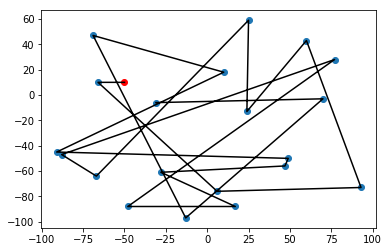

In [30]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

这种方法更不行，如果能既考虑具有又考虑角度就好了，随便试一试

In [48]:
point_list = [(x, y) for x, y in zip(latitudes, longitude)]

In [49]:
max_distance = float('-inf')
for point in point_list:
#     print(point)
    if distance(chosen_p, point) > max_distance:
        max_distance = distance(chosen_p, point)

In [50]:
max_distance

165.3420696616563

In [51]:
point_list

[(-31, -6),
 (70, -3),
 (-13, -97),
 (-69, 47),
 (10, 18),
 (-91, -45),
 (49, -50),
 (47, -56),
 (-28, -61),
 (17, -88),
 (-48, -88),
 (77, 28),
 (-88, -47),
 (-67, -64),
 (25, 59),
 (24, -13),
 (60, 43),
 (-66, 10),
 (93, -73),
 (6, -76)]

In [52]:
max_distance

165.3420696616563

In [53]:
route = [chosen_p]

min_distance = float('inf')

for point in point_list:
    if distance(chosen_p, point) < min_distance:
        min_distance_point = point
        min_distance = distance(chosen_p, point)
        
route.append(min_distance_point)
point_list.remove(min_distance_point)
distance_sum = distance(min_distance_point, chosen_p)
    
# 这里就要从min_distance_point开始了
def get_route(start, point_list):
    if point_list == []: return    
    
    indicator = float('inf')
    
    for point in point_list:
        
        point_indicator = distance(start, point) - angle(chosen_p, start, point) / math.pi * max_distance

        if point_indicator < indicator:
            suitable_point = point
            indicator = point_indicator
    global distance_sum  
    distance_sum += distance(suitable_point, route[-1])
    route.append(suitable_point)
    point_list.remove(suitable_point)     
    get_route(suitable_point, point_list)


In [54]:
get_route(min_distance_point, point_list)

15.91716863267268
131.6043393079723
60.94049819305813
-49.807596426759176
70.90021780027476
-44.70921648568865
104.40211276021645
103.04100754251473
23.721812691698233
82.73789863955795
26.528495541644048
137.53831708785776
-40.958962746531235
-9.375451518309006
77.35761958085298
79.72435220838179
116.76850887369828
154.03955730237388
66.17381011343423
57.445147539488204
108.18915335056009
149.05800443401057
44.967375143018735
57.27274089361181
131.25923631320987
135.64063992857814
109.64828540870566
155.18109921901257
119.7776968651088
96.33858423785513
60.436758441479576
86.99852939545339
30.37692034880655
83.12705567858836
72.99005463596153
177.45441274013592
140.21195067143162
71.01109534659952
-8.646909066446455
120.92348485112606
9.903318832693493
147.7848819663188
47.991416388624664
54.92402625038828
100.85876699264313
97.86566360699265
136.17311555704222
-46.051856262986554
145.73939486347814
135.18581644895073
20.5246111668829
-73.83393622600147
71.23658448174886
91.4760758546

In [55]:
distance_sum = distance_sum + distance(route[-1], chosen_p)

In [56]:
distance_sum

848.2450276429377

In [ ]:
route.append(chosen_p)

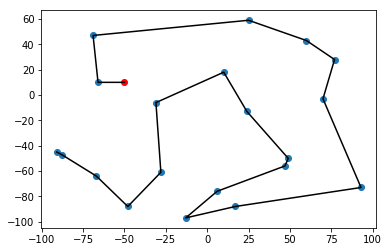

In [57]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

这种方法有时候比找最短好，有时候又不好，不稳定,可以将两种方法合起来

# 动态规划

In [134]:
point_list = [(x, y) for x, y in zip(latitudes, longitude)]

In [135]:
point_list.insert(0, chosen_p)

In [136]:
point_list

[(-50, 10),
 (-31, -6),
 (70, -3),
 (-13, -97),
 (-69, 47),
 (10, 18),
 (-91, -45),
 (49, -50),
 (47, -56),
 (-28, -61),
 (17, -88),
 (-48, -88),
 (77, 28),
 (-88, -47),
 (-67, -64),
 (25, 59),
 (24, -13),
 (60, 43),
 (-66, 10),
 (93, -73),
 (6, -76)]

In [137]:
import pandas as pd
import numpy as np
import math
import time

In [138]:
point_array = np.array(point_list)

In [189]:
point_array.dtype

dtype('int32')

In [140]:
dist = np.zeros((point_array.shape[0], point_array.shape[0]))

In [190]:
dist.dtype

dtype('float64')

In [141]:
for i in range(point_array.shape[0]):
    for j in range(point_array.shape[0]):
        dist[i, j] = math.sqrt(np.sum((point_array[i, :] - point_array[j, :]) ** 2))

In [142]:
dist

array([[  0.        ,  24.8394847 , 120.70211266, 113.21660656,
         41.59326869,  60.5309838 ,  68.60029154, 115.76268829,
        117.32433678,  74.33034374, 118.71394189,  98.02040604,
        128.26924807,  68.50547423,  75.92759709,  89.58794562,
         77.49193506, 114.8433716 ,  16.        , 165.34206966,
        102.62553289],
       [ 24.8394847 ,   0.        , 101.04454463,  92.76313923,
         65.21502894,  47.50789408,  71.56116265,  91.30169768,
         92.64987858,  55.08175742,  95.01578816,  83.74365648,
        113.22543884,  70.21395873,  68.26419266,  85.79627032,
         55.4436651 , 103.35376142,  38.48376281, 140.94325099,
         79.17701687],
       [120.70211266, 101.04454463,   0.        , 125.39936204,
        147.71932846,  63.5688603 , 166.38810054,  51.4781507 ,
         57.7754273 , 113.87712676, 100.16985575, 145.42695761,
         31.78049716, 164.01219467, 149.96666296,  76.6093989 ,
         47.07440918,  47.07440918, 136.6199107 ,  73.6817

In [143]:
"""
N:计数
s:二进制表示，遍历过得城市对应位为0，未遍历为1
dp:动态规划的距离数组
dist：目的地间距离矩阵
sumpath:目前的最小路径总长度
Dtemp：当前最小距离
path:记录下一个应该到达的城市
"""

'\nN:计数\ns:二进制表示，遍历过得城市对应位为0，未遍历为1\ndp:动态规划的距离数组\ndist：目的地间距离矩阵\nsumpath:目前的最小路径总长度\nDtemp：当前最小距离\npath:记录下一个应该到达的城市\n'

In [233]:
N = point_array.shape[0]

In [235]:
path = np.ones((2 ** N -1, N), dtype=np.int)

In [240]:
dp = np.ones((2 ** N - 1, N)) * -1

In [243]:
def TSP(s, init):
    if dp[s][init] != -1:
        return dp[s][init]
    
    if s == 0: # 成立代表遍历结束
        return dist[0][init]
    
    sumpath = float('inf')

    for i in range(N):
        if s & (1 << i): # 判断是否遍历过，未遍历则执行
            m = TSP(s & (~ (1 << i)), i) + dist[i][init]#s & (~ (1 << i))让遍历过的点的相应位置变0
            if m < sumpath:
                sumpath = m
                path[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]

init_point = 0
s = 0
for i in range(1, N):
    s = s|(1<<i)

start = time.time()
distance = TSP(s, init_point)
end = time.time()

for i in range(1, N):
    s = s|(1<<i)
init = 0
num = 0
print(distance)
route = [chosen_p]

while True:
    print(path[s][init])
    init = path[s][init]
    route.append(point_list[init])
    s = s & (~ (1 << init))
    num += 1
    if num > N-2:
        break
print("程序的运行时间是：%s" % (end - start))

2097150
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
741.9733950919434
1
16
5
15
17
12
2
19
7
8
10
20
3
9
11
14
13
6
18
4
程序的运行时间是：178.06202459335327


In [244]:
route.append(chosen_p)

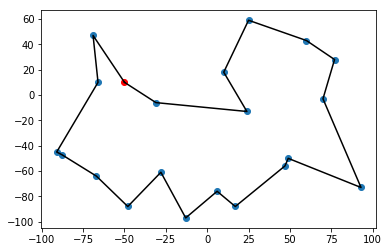

In [245]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
x = [point[0] for point in route]
y = [point[1] for point in route]
plt.plot(x, y, color='black')

k辆车，n个点这种问题感觉应该从实际情况进行区域划分吧

以下为上课代码优化，将n改为n//2，因为过了n//2，都是重复计算

In [13]:
def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        
        return result
    
    return _wrap

In [15]:
from functools import wraps

In [40]:
#@get_call_time
@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n//2+1)], key=lambda x: x[0]
    )

    solution[n] = (n - max_split, max_split)
    
    return max_price

In [41]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [42]:
from collections import defaultdict

In [43]:
price = defaultdict(int)

In [44]:
for i, p in enumerate(original_price): 
    price[i + 1] = p

In [46]:
r(342)

1086

In [29]:
solution = {}

In [47]:
solution

{1: (1, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 2: (2, 0),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2),
 31: (28, 3),
 32: (22, 10),
 33: (22, 11),
 34: (33, 1),
 35: (33, 2),
 36: (33, 3),
 37: (35, 2),
 38: (36, 2),
 39: (33, 6),
 40: (39, 1),
 41: (39, 2),
 42: (39, 3),
 43: (33, 10),
 44: (33, 11),
 45: (44, 1),
 46: (44, 2),
 47: (44, 3),
 48: (46, 2),
 49: (47, 2),
 50: (44, 6),
 51: (50, 1),
 52: (50, 2),
 53: (50, 3),
 54: (44, 10),
 55: (44, 11),
 56: (55, 1),
 57: (55, 2),
 58: (55, 3),
 59: (57, 2),
 60: (58, 2),
 61: (55, 6),
 62: (61, 1),
 63: (61, 2),
 64: (61, 3),
 65: (55, 10),
 66: (55, 11),
 67: (66, 1),
 68: (66, 2),
 69: (66, 3),
 70: (68, 2),
 71: (69, 2),
 72: (66, 6),
